In [2]:
# tfidf_kmeans.py

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset (preprocessed)
data_path = r"C:\Users\tered\Desktop\recommender_system\data\processed\books_titles_clean.csv"
df = pd.read_csv(data_path)

# Preview the data
print("Dataset loaded. Shape:", df.shape)
print(df.head())

Dataset loaded. Shape: (6810, 13)
          isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content

In [4]:
# Get only the titles
titles = df['title'].astype(str).tolist()

# Step 1: Vectorize titles using TF-IDF
print("Vectorizing titles with TF-IDF...")
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(titles)

Vectorizing titles with TF-IDF...


In [5]:
# Step 2: Apply KMeans clustering
n_clusters = 20  # You can adjust this based on elbow method
print(f"Clustering into {n_clusters} clusters using KMeans...")
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(tfidf_matrix)

# Step 3: Assign cluster labels
df['cluster'] = labels

Clustering into 20 clusters using KMeans...


In [6]:
# Step 4: Compute Silhouette Score
sil_score = silhouette_score(tfidf_matrix, labels)
print(f"Silhouette Score: {sil_score:.4f}")

Silhouette Score: 0.0142


In [7]:
# Step 5: Pick a book by index (e.g., 5) and find top 10 similar titles
book_index = 2676
print(f"\nFinding recommendations for book index: {book_index}")
book_vector = tfidf_matrix[book_index]

# Compute cosine similarities
similarities = cosine_similarity(book_vector, tfidf_matrix).flatten()

# Get top 10 similar books (excluding itself)
top_indices = similarities.argsort()[::-1][1:11]
top_scores = similarities[top_indices]

print("\nTop 10 Recommendations based on TF-IDF + Cosine Similarity:\n")
for rank, (idx, score) in enumerate(zip(top_indices, top_scores), 1):
    print(f"{rank}. {df.loc[idx, 'title']} (Similarity: {score:.4f})")


Finding recommendations for book index: 2676

Top 10 Recommendations based on TF-IDF + Cosine Similarity:

1. Harry Potter (Similarity: 0.5814)
2. Harry Potter and Philosophy (Similarity: 0.4972)
3. Harry Potter and the Chamber of Secrets (Book 2) (Similarity: 0.4732)
4. The Science of Harry Potter (Similarity: 0.4696)
5. The Harry Potter Collection (Similarity: 0.4629)
6. Harry Potter and the Sorcerer's Stone (Book 1) (Similarity: 0.4611)
7. Harry Potter and the Prisoner of Azkaban (Book 3) (Similarity: 0.4525)
8. Harry Potter and the Half-Blood Prince (Book 6) (Similarity: 0.4369)
9. Harry Potter and the Goblet of Fire (Similarity: 0.4225)
10. Red Phoenix (Similarity: 0.4111)


In [15]:
# Step 5: Pick a book by index (e.g., 5) and find top 10 similar titles
book_index = 2710
print(f"\nFinding recommendations for book index: {book_index}")
book_vector = tfidf_matrix[book_index]

# Compute cosine similarities
similarities = cosine_similarity(book_vector, tfidf_matrix).flatten()

# Get top 10 similar books (excluding itself)
top_indices = similarities.argsort()[::-1][1:11]
top_scores = similarities[top_indices]

selected_title = df.loc[book_index, 'title']
selected_id = df.loc[book_index, 'ID']  # si tienes una columna 'book_id'

print(f"\nSelected book [{selected_id}]: {selected_title}")


print("\nTop 10 Recommendations based on TF-IDF + Cosine Similarity:\n")
for rank, (idx, score) in enumerate(zip(top_indices, top_scores), 1):
    book_id = df.loc[idx, 'ID']  # Asegúrate de que esta columna exista
    book_title = df.loc[idx, 'title']
    print(f"{rank}. [{book_id}] {book_title} (Similarity: {score:.4f})")



Finding recommendations for book index: 2710

Selected book [2711]: Harry Potter and the Prisoner of Azkaban (Book 3)

Top 10 Recommendations based on TF-IDF + Cosine Similarity:

1. [4526] Harry Potter and the Prisoner of Azkaban (Similarity: 0.9421)
2. [2713] Harry Potter (Similarity: 0.5866)
3. [5205] Harry Potter and Philosophy (Similarity: 0.5017)
4. [2662] Harry Potter and the Chamber of Secrets (Book 2) (Similarity: 0.4775)
5. [4600] The Science of Harry Potter (Similarity: 0.4738)
6. [2731] The Harry Potter Collection (Similarity: 0.4671)
7. [2699] Harry Potter and the Sorcerer's Stone (Book 1) (Similarity: 0.4653)
8. [2677] Harry Potter and the Order of the Phoenix (Book 5) (Similarity: 0.4525)
9. [2724] Harry Potter and the Half-Blood Prince (Book 6) (Similarity: 0.4408)
10. [4509] Harry Potter and the Goblet of Fire (Similarity: 0.4263)


In [9]:
# Step 6: Compute average cosine similarity of recommendations
avg_cosine_sim = np.mean(top_scores)
print(f"\nAverage Cosine Similarity of Top 10: {avg_cosine_sim:.4f}")


Average Cosine Similarity of Top 10: 0.4668


In [10]:
# Step 7: Compute Intra-list Diversity (1 - average pairwise cosine similarity)
recs_vectors = tfidf_matrix[top_indices]
pairwise_sims = cosine_similarity(recs_vectors)
intra_list_diversity = 1 - np.mean(pairwise_sims[np.triu_indices(10, k=1)])
print(f"Intra-list Diversity: {intra_list_diversity:.4f}")

Intra-list Diversity: 0.5630


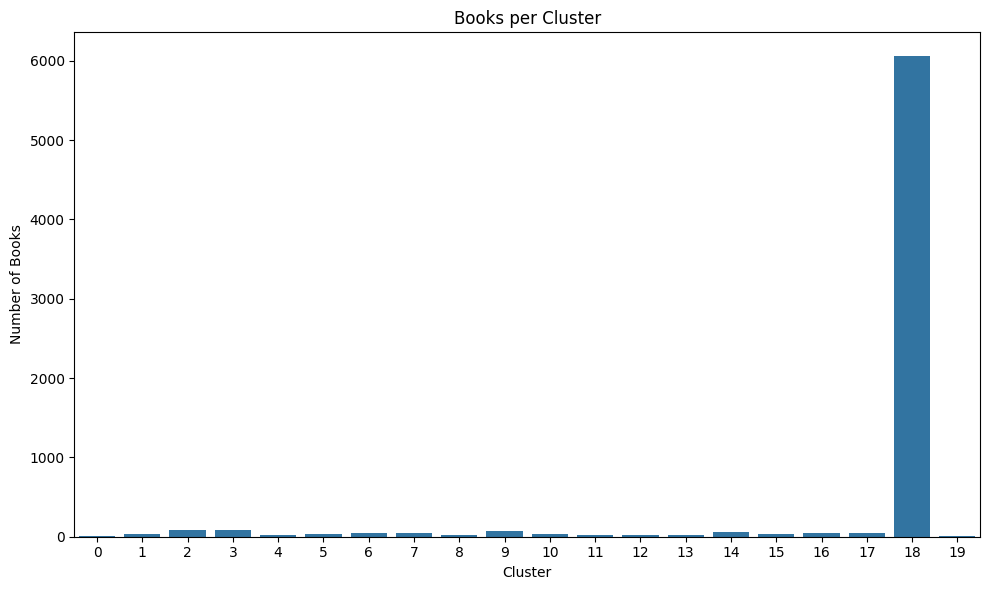

In [11]:
# Step 8: Visualize cluster distribution (optional)
plt.figure(figsize=(10, 6))
sns.countplot(x=labels)
plt.title("Books per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Books")
plt.tight_layout()
plt.savefig("cluster_distribution.png")
plt.show()

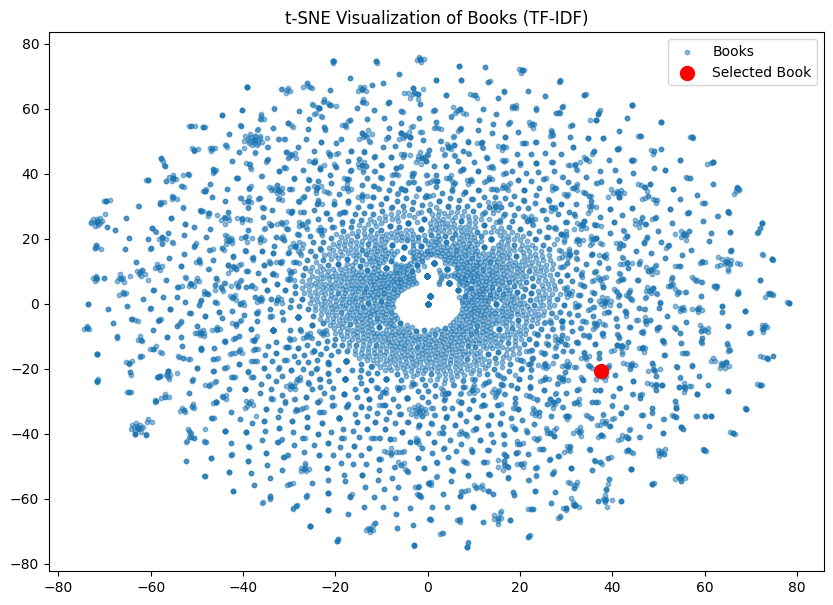

In [12]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Step 6: Visualize the book vectors using t-SNE only

# Reduce dimensionality with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tfidf_tsne = tsne.fit_transform(tfidf_matrix.toarray())  # convert sparse to dense

# Plotting function for t-SNE
def plot_embedding(embedding, title, selected_idx):
    plt.figure(figsize=(10, 7))
    plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.5, s=10, label='Books')
    # Highlight the selected book
    plt.scatter(embedding[selected_idx, 0], embedding[selected_idx, 1],
                color='red', s=100, label='Selected Book')
    plt.title(title)
    plt.legend()
    plt.show()

# Show t-SNE plot
plot_embedding(tfidf_tsne, 't-SNE Visualization of Books (TF-IDF)', book_index)


c:\Users\tered\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\tered\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tered\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\tered\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random init

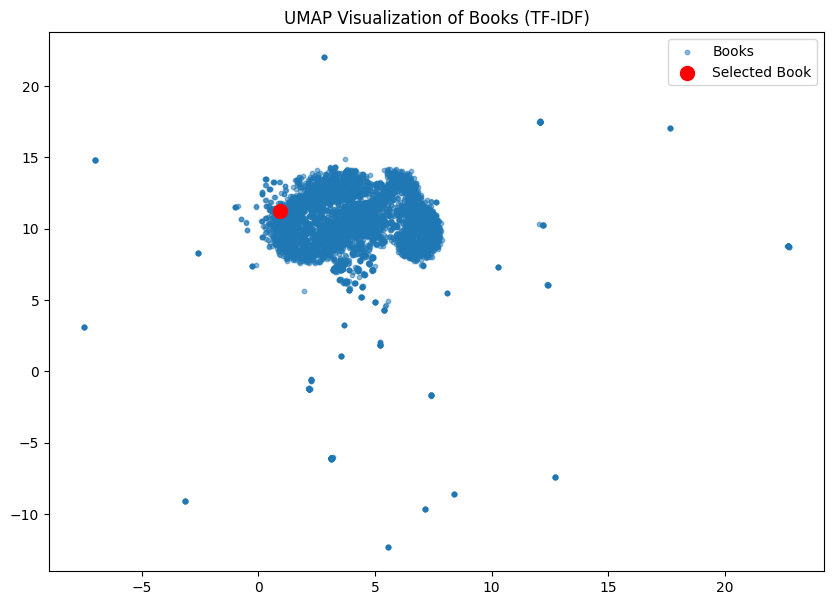

In [13]:
import umap.umap_ as umap  # only if installed

# Reduce dimensionality with UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
tfidf_umap = umap_reducer.fit_transform(tfidf_matrix.toarray())

# Show UMAP plot
plot_embedding(tfidf_umap, 'UMAP Visualization of Books (TF-IDF)', book_index)
